# Data Preprocessing Tools

## Importing the libraries

In [11]:
%pip install git+https://github.com/hyperopt/hyperopt-sklearn.git --user

  Cloning https://github.com/hyperopt/hyperopt-sklearn.git to c:\users\rozst\appdata\local\temp\pip-req-build-ju5utkb2
  Resolved https://github.com/hyperopt/hyperopt-sklearn.git to commit 4b3f6fde3a1ded2e71e8373d52c1b51a0239ef91
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone -q https://github.com/hyperopt/hyperopt-sklearn.git 'C:\Users\rozst\AppData\Local\Temp\pip-req-build-ju5utkb2'


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import time
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import KFold, cross_val_score

from hpsklearn import HyperoptEstimator
from hyperopt import tpe
warnings.filterwarnings("ignore")

## Importing the dataset

In [4]:
train = pd.read_csv("dataset/train-1.csv")
# test = pd.read_csv("test.csv")
train['Data'] = 'Train'
# test['Data'] = 'Test'
both = pd.concat([train], axis=0).reset_index(drop=True)
both['subject'] = '#' + both['subject'].astype(str)
both = both.sample(frac=0.10, replace=True, random_state=1)

In [5]:
print(len(both))

735


## Taking care of missing data

In [6]:
def basic_details(df):
    b = pd.DataFrame()
    b['Missing value'] = df.isnull().sum()
    b['N unique value'] = df.nunique()
    b['dtype'] = df.dtypes
    return b
basic_details(both)

,Missing value,N unique value,dtype
tBodyAcc-mean()-X,0,691,float64
tBodyAcc-mean()-Y,0,691,float64
tBodyAcc-mean()-Z,0,691,float64
tBodyAcc-std()-X,0,691,float64
tBodyAcc-std()-Y,0,691,float64
...,...,...,...
"angle(Y,gravityMean)",0,691,float64
"angle(Z,gravityMean)",0,691,float64
subject,0,21,object
Activity,0,6,object


In [7]:
activity = both['Activity']
label_counts = activity.value_counts()

# plt.figure(figsize= (12, 8))
# plt.bar(label_counts.index, label_counts)

In [8]:
Data = both['Data']
Subject = both['subject']
train = both.copy()
train = train.drop(['Data','subject','Activity'], axis =1)

In [ ]:
print(train)

[[-1.70614350e+01  5.66438743e+00  5.79382745e-01 ... -4.09576252e-01
  -8.61427705e-02 -4.33322887e-01]
 [ 6.51200608e+00 -4.63371018e+00 -3.90130223e+00 ... -1.52639407e+00
  -9.82100873e-01  1.10805220e+00]
 [-1.60559952e+01  5.80378577e+00 -3.80128257e-01 ...  1.36093870e+00
  -1.45478484e-02 -2.53461742e-01]
 ...
 [ 1.04058142e+01 -4.01304459e+00  2.67254890e+00 ... -1.45478191e+00
   1.94745791e+00 -4.27751049e-01]
 [ 7.27214699e+00 -1.35323003e+01  3.06328384e+00 ... -2.97603203e-01
   2.99437088e-01  1.38359729e+00]
 [-1.62017435e+01  7.37397001e+00 -1.36693770e+00 ...  6.15318759e-01
  -3.20261126e-01 -3.54369807e-01]]


## Scaleing

In [9]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
slc = StandardScaler()
train = slc.fit_transform(train)

# dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=20, random_state=0)
train = pca.fit_transform(train)

print(train)
print(len(train[0]))

[[-1.27222177e+01  4.35247115e-01  2.69887106e-03 ...  8.48759788e-01
   2.66407328e+00  1.26074275e+00]
 [-1.63988825e+01 -5.92090134e+00 -7.30864147e-02 ...  1.91462787e-01
  -1.13194600e-01 -9.56326898e-01]
 [-1.55072717e+01 -5.01624345e+00  4.02950782e-01 ...  7.96752386e-01
   9.08511043e-01 -8.04194183e-02]
 ...
 [ 1.45180696e+01  5.57007312e+00 -3.12796445e+00 ...  2.63451566e+00
   5.56727931e-01 -1.75998839e+00]
 [-1.50871267e+01 -4.01676838e+00  3.57495373e-01 ... -3.64931558e-02
  -1.57222251e+00 -5.77226707e-01]
 [ 1.06463154e+01  4.94605751e+00 -1.18994446e+00 ...  1.13707611e+00
   1.52459652e+00 -1.60531662e+00]]
20


## Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, activity, test_size = 0.2, random_state = 0)

# Activity Recognition Algorithm

100%|██████████| 150/150 [00:05<00:00,  5.26s/trial, best loss: 0.10169491525423724]
{'learner': GradientBoostingClassifier(learning_rate=0.09876723057471828,
                           max_features=0.4628181612161242, n_estimators=955,
                           random_state=0, verbose=False), 'preprocs': (Normalizer(),), 'ex_preprocs': ()}
                    precision    recall  f1-score   support

            LAYING       0.96      0.96      0.96        23
           SITTING       0.75      0.82      0.78        22
          STANDING       0.90      0.84      0.87        32
           WALKING       0.90      0.96      0.93        28
WALKING_DOWNSTAIRS       0.90      0.90      0.90        20
  WALKING_UPSTAIRS       0.95      0.86      0.90        22

          accuracy                           0.89       147
         macro avg       0.89      0.89      0.89       147
      weighted avg       0.89      0.89      0.89       147



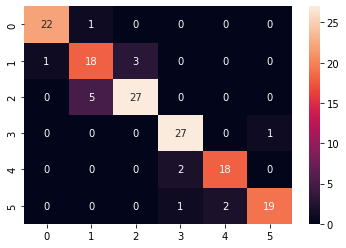

In [13]:

# Test options and evaluation metric
num_folds = 10
seed = 0
scoring = 'accuracy'
results = {}
accuracy = {}

# Finalizing the model and comparing the test, predict results

tic = time.perf_counter()
estim = HyperoptEstimator(algo=tpe.suggest, 
                            max_evals=150, 
                            trial_timeout=60)

estim.fit( X_train, y_train )

# Make a prediction using the optimized model
y_predict = estim.predict( X_test )

# Report the accuracy of the classifier on a given set of data
score = estim.score( X_test, y_test )

# Return instances of the classifier and preprocessing steps
model = estim.best_model()

# model = TPOTClassifier(generations=5, population_size=50, cv=5, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)

# _ = cross_val_score(model, X_train, y_train, cv=10, scoring=scoring)
# results["GScv"] = (_.mean(), _.std())

# model.fit(X_train, y_train) 
# y_predict = model.predict(X_test)

accuracy["GScv"] = accuracy_score(y_test, y_predict)

print(model)
print(classification_report(y_test, y_predict))

cm= confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

toc = time.perf_counter()
tictoc = toc - tic

In [12]:
print(f"Trained in {toc - tic:0.4f} seconds")

Trained in 174.5250 seconds
